In [1]:
import dicom2nifti
import nibabel as nb
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
#betelgeuse
dicom_dir = '/home/john/cubric/data/7TMPRAGE/22_10_28-11_18_31-DST-1_3_12_2_1107_5_2_34_18984/scans/44-MP2RAGE_UK7T_081018_tfl_wip944_b17stx_RR_UniformSens_MAG/resources/DICOM/files'

In [28]:
#dell laptop (Win)
dicom_dir = 'c:\data\mr_training_data\iscf_mprage'
dicom_dir = 'c:\data\mr_training_data\wand_irspgr'

In [2]:
#wl026
dicom_dir = '/home/sapje1/scratch_sapje1/projects/476_bbbcov/temp_psir_test/22_10_17-11_23_37-DST-1_3_12_2_1107_5_2_34_18984/scans/43-MP2RAGE_UK7T_081018_tfl_wip944_b17stx_RR_UniformSens_MAG/resources/DICOM/files'
dicom_dir = '/home/sapje1/Downloads/22_07_07-09_44_48-DST-1_3_12_2_1107_5_2_43_66075/scans/2-MPRAGE_iPAT2/resources/DICOM/files'
dicom_dir = '/home/sapje1/scratch_sapje1/projects/andre/dcm/t1_mprage_sag_iso_1mm_ND'

In [29]:
#  use icometrix dicom2nifti to convert dicom to nifti

os.chdir(dicom_dir)
nifti_fname = os.path.join(dicom_dir, 'nifti.nii.gz')
nifti_out = dicom2nifti.dicom_series_to_nifti(dicom_dir, nifti_fname, reorient_nifti=True)
# out contains dict with file info
nifti_img = nb.load(nifti_out['NII_FILE'])

In [30]:
print(nifti_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 128, 128)
affine: 
[[  -1.72000003    0.            0.           90.12446594]
 [   0.            1.71875       0.          -96.68347931]
 [  -0.           -0.            1.71875    -107.9090271 ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 128 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.       1.72     1.71875  1.71875  1.       1.       1.       1.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0


In [31]:
nifti_img_data = nifti_img.get_fdata()
nifti_img_data.shape

(104, 128, 128)

<IPython.core.display.Javascript object>


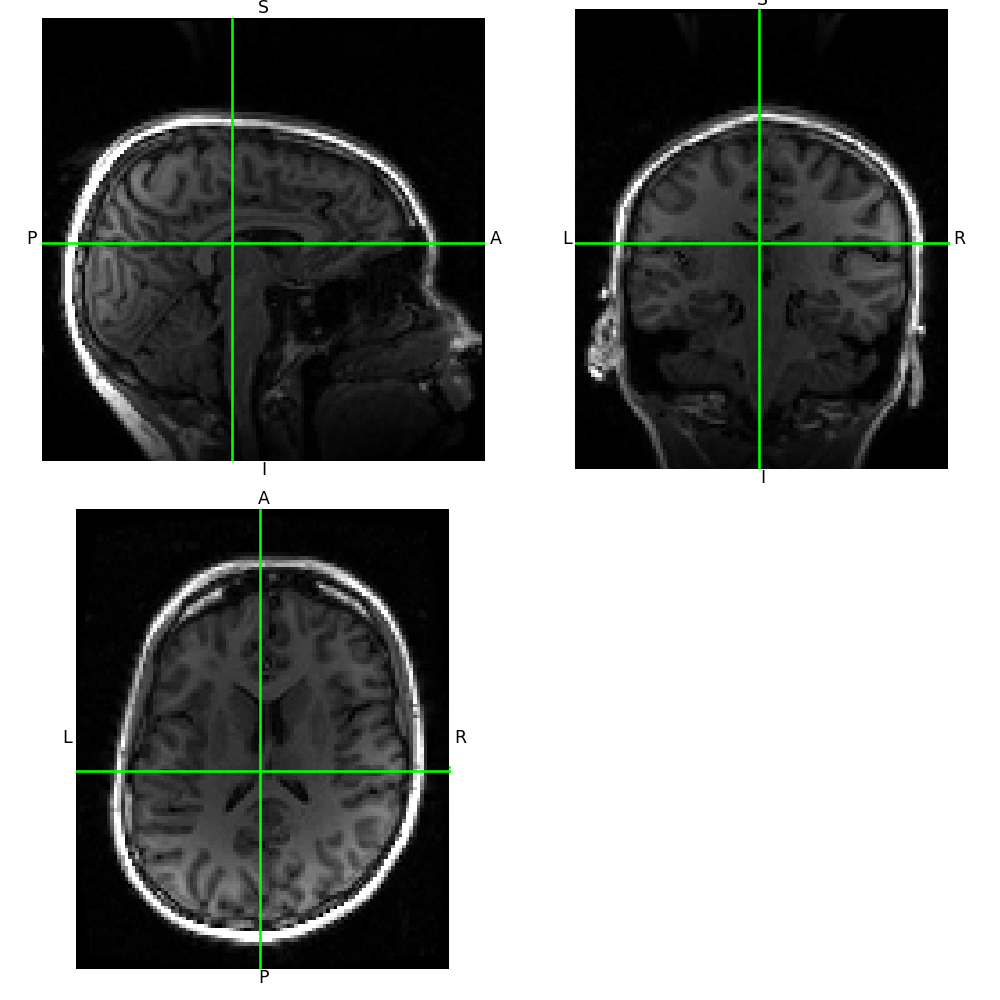

<OrthoSlicer3D: c:\data\mr_training_data\wand_irspgr\nifti.nii.gz (104, 128, 128)>

In [32]:
%matplotlib notebook
nifti_img.orthoview()

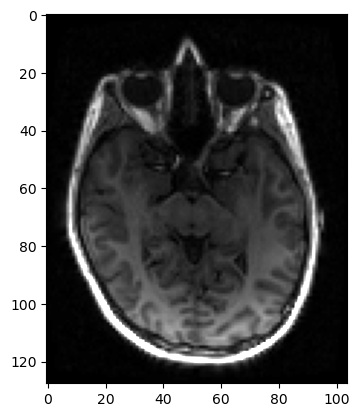

In [44]:
%matplotlib inline
plt.imshow(np.rot90(nifti_img_data[:,:,50]), cmap='gray', vmin=0, vmax=100)

In [73]:
histo = np.histogram(nifti_img_data, bins=100, range=(0,400))

<BarContainer object of 100 artists>

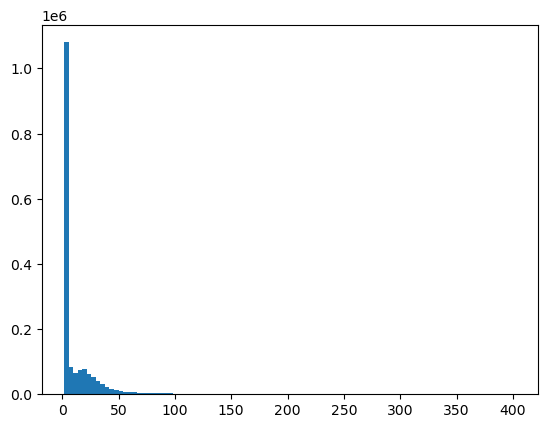

In [72]:
plt.bar( histo[1][1:], histo[0], width=4)
